<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [1]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [2]:
# Write your code here

print(f" The data types are: \n{df.dtypes}")

print(f"The count of each column is as follows: \n{df.count()}")

print(f"The missing values of each column is as follows: \n{df.isnull().sum().sort_values(ascending=False)}")

 The data types are: 
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
The count of each column is as follows: 
ResponseId             65437
MainBranch             65437
Age                    65437
Employment             65437
RemoteWork             54806
                       ...  
JobSatPoints_11        29445
SurveyLength           56182
SurveyEase             56238
ConvertedCompYearly    23435
JobSat                 29126
Length: 114, dtype: int64
The missing values of each column is as follows: 
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [3]:
# Write your code here

df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [4]:
# Write your code here

def analyze_columns(df, column_name):

    print(f"===ANALYSIS FOR COLUMN: '{column_name}'===")
    print(f"Data type: {df[column_name].dtype}")
    print(f"Total rows: {len(df)}")
    print(f"Non-null values: {df[column_name].count()}")
    print(f"Null values: {df[column_name].isnull().sum()}")
    print(f"Unique Values: {df[column_name].nunique()}")

    if df[column_name].nunique() < 50:
        print(f"\nValuecounts:")
        print(df[column_name].value_counts(dropna=False).head(20))

    else: 
        print(f"\nTop 10 Values:")
        print(df[column_name].value_counts().head(10))
        print(f"\nBottom 10 Values:")
        print(df[column_name].value_counts().tail(10))

    return df[column_name]

for col in ['Employment', 'Country', 'EdLevel']:
    analyze_columns(df,col)
    print("\n"+"="*50+"\n")


===ANALYSIS FOR COLUMN: 'Employment'===
Data type: object
Total rows: 65437
Non-null values: 65437
Null values: 0
Unique Values: 110

Top 10 Values:
Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-time                                                          1266
Student, full-time;Employed, part-time                                       1115
Employed, full-time;Student, full-time                                        897
Employed, full-time;Student, part-time                                        839
Student, full-time;Not employed, but looking for work                         686
Name: count, dtype: 

<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [5]:
df_encoded = pd.get_dummies(df,columns=['Employment'], dtype=int)
df_encoded.head()

,ResponseId,MainBranch,Age,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,"Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Employment_Student, full-time;Not employed, but looking for work;Retired","Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Retired","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired"
0,1,I am a developer by profession,Under 18 years old,Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,2,I am a developer by profession,35-44 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0,0,0,0,0,0,0,0,0,0
2,3,I am a developer by profession,45-54 years old,Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0,0,0,0,0,0,0,0,0,0
3,4,I am learning to code,18-24 years old,NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,0,0,0,0,0,0,0,0,0,0
4,5,I am a developer by profession,18-24 years old,NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,0,0,0,0,0,0,0,0,0,0


### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [6]:
print(f"The top 5 columns with missing values are: \n{df.isnull().sum().sort_values(ascending=False).head(5)}")

The top 5 columns with missing values are: 
AINextMuch less integrated    64289
AINextLess integrated         63082
AINextNo change               52939
AINextMuch more integrated    51999
EmbeddedAdmired               48704
dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [7]:
def recommend_imputation_method(df, column_name):
        
    data = df[column_name].dropna()
    if len(data) == 0:
        return "No data to analyze"
    initial_null_values = df[column_name].isna().sum()

    # Calculate key metrics
    skewness = data.skew()
    outlier_pct = calculate_outlier_percentage(data)
    
    # Decision rules
    reasons = []
    
    if abs(skewness) < 0.5:
        reasons.append("symmetric distribution")
        recommendation = "mean"
    elif abs(skewness) < 1:
        reasons.append("moderately skewed distribution")
        recommendation = "median"
    else:
        reasons.append("highly skewed distribution")
        recommendation = "median"
    
    if outlier_pct > 5:
        reasons.append("significant outliers present")
        recommendation = "median"
    
    # Check if mean and median are very different
    mean_val = data.mean()
    median_val = data.median()
    difference_pct = abs(mean_val - median_val) / median_val * 100
    
    if difference_pct > 10 and recommendation == "mean":
        reasons.append("mean and median differ significantly")
        recommendation = "median"
    
    print(f"Column: {column_name}")
    print(f"Recommendation: {recommendation.upper()}")
    print(f"Reasons: {', '.join(reasons)}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Outliers: {outlier_pct:.1f}%")
    print(f"Mean: {mean_val:.2f}, Median: {median_val:.2f}")

    if recommendation == "mean":
        impute_value = df[column_name].mean()
        df[column_name] = df[column_name].fillna(impute_value)
    else:
        impute_value = df[column_name].median()
        df[column_name] = df[column_name].fillna(impute_value)
    
    return f"The recommendation was {recommendation}. Therefore, the missing values were filled with the {recommendation} of {impute_value}. There previously were {initial_null_values} null values, and now there are {df[column_name].isnull().sum()}"

def calculate_outlier_percentage(data):
    """Calculate percentage of outliers using IQR method"""
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers) / len(data) * 100


In [8]:
import numpy as np
num_columns = df.select_dtypes(include=[np.number])
col_list = num_columns.columns.tolist()

In [19]:
for col in col_list:
    recommend_imputation_method(df, col)

Column: ResponseId
Recommendation: MEAN
Reasons: symmetric distribution
Skewness: 0.00
Outliers: 0.0%
Mean: 32719.00, Median: 32719.00
Column: CompTotal
Recommendation: MEDIAN
Reasons: highly skewed distribution, significant outliers present
Skewness: nan
Outliers: 43.0%
Mean: 15281874169048093211708047889145191506031454080645451784328843979468465677275111407299688511091277450791269230886214247069746084837727068621897728.00, Median: 110000.00
Column: WorkExp
Recommendation: MEDIAN
Reasons: highly skewed distribution, significant outliers present
Skewness: 2.36
Outliers: 43.8%
Mean: 10.12, Median: 9.00
Column: JobSatPoints_1
Recommendation: MEDIAN
Reasons: highly skewed distribution, significant outliers present
Skewness: 3.11
Outliers: 38.7%
Mean: 13.85, Median: 10.00
Column: JobSatPoints_4
Recommendation: MEDIAN
Reasons: highly skewed distribution, significant outliers present
Skewness: 5.31
Outliers: 14.5%
Mean: 3.38, Median: 0.00
Column: JobSatPoints_5
Recommendation: MEDIAN
Reasons

c:\Users\karlk\anaconda3\Lib\site-packages\pandas\core\nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
c:\Users\karlk\anaconda3\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\karlk\anaconda3\Lib\site-packages\pandas\core\nanops.py:1272: RuntimeWarning: overflow encountered in scalar power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)
C:\Users\karlk\AppData\Local\Temp\ipykernel_45696\4113377204.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  difference_pct = abs(mean_val - median_val) / median_val * 100
C:\Users\karlk\AppData\Local\Temp\ipykernel_45696\4113377204.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  difference_pct = abs(mean_val - median_val) / median_val * 100
C:\Users\karlk\AppData\Local\Temp\ipykernel_45696\4113377204.py:32: RuntimeWar

<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [10]:
import statistics
from collections import Counter

def impute_cat_columns(df, column):
    
    if column not in df.columns:
        return f"Error: Column '{column}' not found in DataFrame"
    
    initial_null_count = df[column].isnull().sum()
    
    if initial_null_count == 0:
        return f"The column '{column}' has no null values to impute."
    
    data = df[column].dropna()
    
    if len(data) == 0:
        return f"Error: Column '{column}' has no non-null values to calculate mode."
    
    try:
        impute_value = statistics.mode(data)
        
        df[column] = df[column].fillna(impute_value)
        final_null_count = df[column].isnull().sum()
        
        return f"✅ Column '{column}': {initial_null_count} null values filled with '{impute_value}'. Remaining nulls: {final_null_count}"
        
    except statistics.StatisticsError:
        return impute_cat_columns_multimode(df, column)

def impute_cat_columns_multimode(df, column):
    data = df[column].dropna()
    initial_null_count = df[column].isnull().sum()
    
    value_counts = Counter(data)
    most_common = value_counts.most_common(1)
    
    if most_common:
        impute_value = most_common[0][0]
        df[column] = df[column].fillna(impute_value)
        final_null_count = df[column].isnull().sum()
        
        return f"✅ Column '{column}': {initial_null_count} null values filled with '{impute_value}' (most frequent). Remaining nulls: {final_null_count}"
    else:
        return f"Error: Could not determine mode for column '{column}'"

In [11]:
cat_columns = df.select_dtypes(include='object')
cat_columns = cat_columns.columns.tolist()

for col in cat_columns:
    result = impute_cat_columns(df,col)
    print(result)

The column 'MainBranch' has no null values to impute.
The column 'Age' has no null values to impute.
The column 'Employment' has no null values to impute.
✅ Column 'RemoteWork': 10631 null values filled with 'Hybrid (some remote, some in-person)'. Remaining nulls: 0
The column 'Check' has no null values to impute.
✅ Column 'CodingActivities': 10971 null values filled with 'Hobby'. Remaining nulls: 0
✅ Column 'EdLevel': 4653 null values filled with 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'. Remaining nulls: 0
✅ Column 'LearnCode': 4949 null values filled with 'Other online resources (e.g., videos, blogs, forum, online community)'. Remaining nulls: 0
✅ Column 'LearnCodeOnline': 16200 null values filled with 'Technical documentation;Blogs;Written Tutorials;Stack Overflow'. Remaining nulls: 0
✅ Column 'TechDoc': 24540 null values filled with 'API document(s) and/or SDK document(s);User guides or README files found in the source repository;Traditional public search engine'. Remaining n

### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [12]:
def normalizer(df,column_name, new_column_name=None):
    if new_column_name is None:
        new_column_name = f"Normalized_{column_name}"

    if column_name not in df.columns:
        print(f"Error: {column_name} is not found")
        return df
    
    clean_data = df[column_name].dropna()

    if len(clean_data) == 0:
        print(f"WARNING: there is no valid data in column '{column_name}'.")
        return df

    min_value = df[column_name].min()
    max_value = df[column_name].max()

    if min_value == max_value:
        print(f"WARNING: All of the values in {column_name} are of the same value ({min_value}).")
        df[new_column_name] = 0.5

    else:
        df[new_column_name] = (df[column_name]-min_value)/(max_value-min_value)

    print(f"All of the data from {column_name} has been normalized in {new_column_name}")
    print(f" Range: {min_value:,.2f} to {max_value:,.2f}")

    return df

In [13]:
normalizer(df,'ConvertedCompYearly')

All of the data from ConvertedCompYearly has been normalized in Normalized_ConvertedCompYearly
 Range: 1.00 to 16,256,603.00


C:\Users\karlk\AppData\Local\Temp\ipykernel_45696\1352655923.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_column_name] = (df[column_name]-min_value)/(max_value-min_value)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Normalized_ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,15.0,10.0,5.0,0.0,0.0,Too long,Easy,65000.0,7.0,0.003998
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Too short,Easy,65000.0,7.0,0.003998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,15.0,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


Text(0, 0.5, 'Frequency')

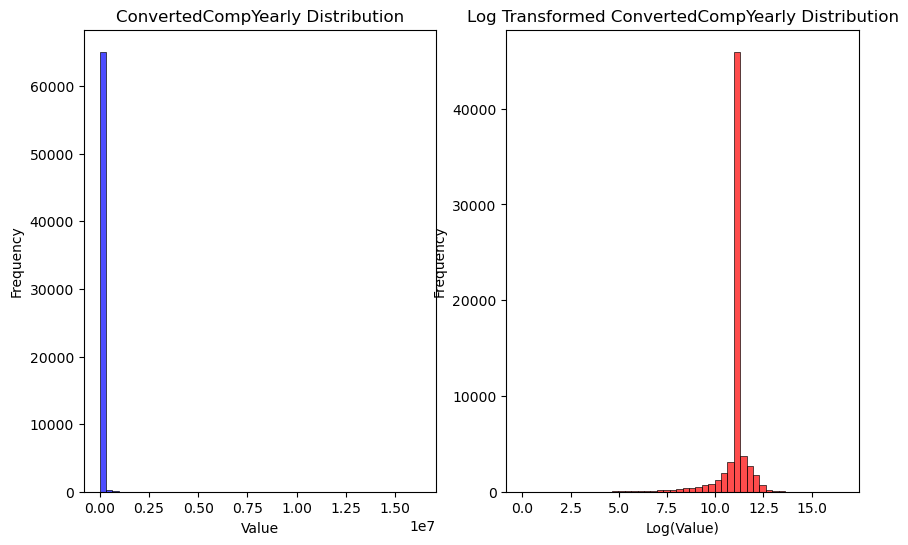

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

log_data = np.log(df['ConvertedCompYearly'])
log_data

figs,axs = plt.subplots(1,2, figsize=(10,6))


sns.histplot(df['ConvertedCompYearly'], bins=50, alpha=0.7, color='blue', ax=axs[0])
axs[0].set_title('ConvertedCompYearly Distribution')
axs[0].set_xlabel('Value')
axs[0].set_ylabel('Frequency')

sns.histplot(log_data, bins = 50, alpha=0.7, color='red', ax=axs[1])
axs[1].set_title('Log Transformed ConvertedCompYearly Distribution')
axs[1].set_xlabel('Log(Value)')
axs[1].set_ylabel('Frequency')


### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


In [15]:
def experience_level(df, years_column, new_column = 'ExperienceLevel'):

    def categorize_experience(years):
        if years == 'Less than 1 year':
            return 'Junior'
        elif years == 'More than 50 years':
            return 'Senior'
        
        try:
            years_num = float(years)
        except (ValueError, TypeError):
            return 'Unknown'
        
        if years_num <=3:
            return 'Junior'
        elif years_num <=5:
            return 'Mid-level'
        elif years_num >5:
            return 'Senior'
        else:
            return 'Unknown'
    
    df[new_column] = df[years_column].apply(categorize_experience)

    print("Experience Level Distribution:")
    print(df[new_column].value_counts())

    return df

In [16]:
experience_level(df, 'YearsCodePro')

Experience Level Distribution:
ExperienceLevel
Senior       31113
Junior       27583
Mid-level     6741
Name: count, dtype: int64


C:\Users\karlk\AppData\Local\Temp\ipykernel_45696\2824623496.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_column] = df[years_column].apply(categorize_experience)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Normalized_ConvertedCompYearly,ExperienceLevel
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,Technical documentation;Blogs;Written Tutorial...,...,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Junior
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Senior
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Senior
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,10.0,5.0,0.0,0.0,Too long,Easy,65000.0,7.0,0.003998,Junior
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,10.0,5.0,0.0,0.0,Too short,Easy,65000.0,7.0,0.003998,Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",Technical documentation;Blogs;Written Tutorial...,...,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Junior
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Junior
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,10.0,5.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Mid-level
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,Appropriate in length,Easy,65000.0,7.0,0.003998,Junior


### Summary


In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
